In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("churn-bigml-80.csv")

In [2]:
df["Churn"] = df["Churn"].astype(int)

cat_cols = df.select_dtypes(include=["object"]).columns
for c in cat_cols:
    df[c] = LabelEncoder().fit_transform(df[c])

X = df.drop("Churn", axis=1)
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    rf,
    param_grid=params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(grid.best_params_)


{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [5]:
y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(precision, recall, f1)
print(classification_report(y_test, y_pred))


0.9636363636363636 0.6794871794871795 0.7969924812030075
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.96      0.68      0.80        78

    accuracy                           0.95       534
   macro avg       0.96      0.84      0.88       534
weighted avg       0.95      0.95      0.95       534



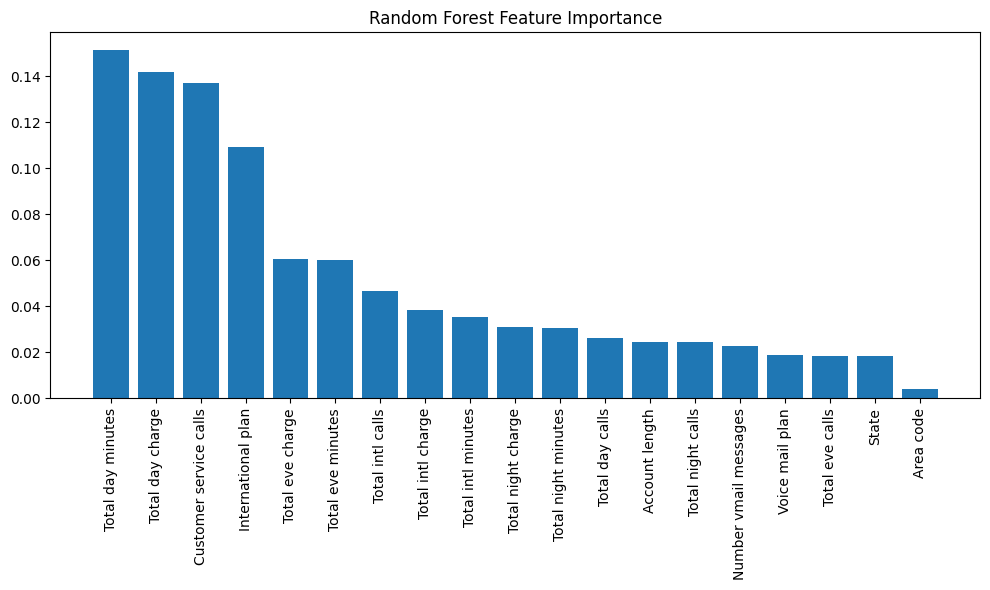

In [6]:
importances = best_model.feature_importances_
feat_names = X.columns

idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), feat_names[idx], rotation=90)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
importance_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)
print(importance_df.head(20))


                   Feature  Importance
6        Total day minutes    0.151463
8         Total day charge    0.141842
18  Customer service calls    0.136957
3       International plan    0.109373
11        Total eve charge    0.060588
9        Total eve minutes    0.059935
16        Total intl calls    0.046541
17       Total intl charge    0.038552
15      Total intl minutes    0.035519
14      Total night charge    0.030809
12     Total night minutes    0.030376
7          Total day calls    0.026400
1           Account length    0.024620
13       Total night calls    0.024321
5    Number vmail messages    0.022838
4          Voice mail plan    0.018817
10         Total eve calls    0.018537
0                    State    0.018320
2                Area code    0.004193
